# WT_MT_Ramsey
This is the code used for extracting the data from RDME-ODE simulation results for Grep and generating the figures similar to the ones in the Ramsey et al. 2006 paper.


In [1]:
%run env.ipynb
import pickle
import os
import numpy as np
from jLM.RDME import File as RDMEFile
import jLM
import json
import matplotlib.pyplot as plt
import seaborn as sns
from traj_analysis_rdme import *
from tqdm import tqdm
import pandas as pd
import logging
# Define directories
wt_traj_dir = "/data2/2024_Yeast_GS/my_current_code/rdme_ode_results/20241107wtmt_ramsey/"
mt_traj_dir = "/data2/2024_Yeast_GS/my_current_code/rdme_ode_results/20250204_11_1_420_MT_newgeo/"
fig_dir = os.path.join(mt_traj_dir ,'figures_comparison_WTMT/' )

# Configure logging
log_file = os.path.join(fig_dir, 'run_log.log')
if not os.path.exists(fig_dir):
    os.makedirs(fig_dir)

logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s',
    handlers=[
        logging.FileHandler(log_file),
        logging.StreamHandler()
    ]
)

logging.info(f"Starting comparison of WT and MT data in directory: {wt_traj_dir}")

wt_files = [f for f in os.listdir(wt_traj_dir) if f.startswith('yeast1.1')  and 'wt' in f.lower() and f.endswith('.lm')]
mt_files = [f for f in os.listdir(mt_traj_dir) if f.startswith('yeast1.1') and f.endswith('.lm')]
traj_suff = "_ode.jsonl"

logging.info(f"WT files: {wt_traj_dir}")
logging.info(f"MT files: {mt_traj_dir}")
logging.info(f"Final results saved in : {fig_dir}")


2025-02-27 13:27:01,905 - INFO - Starting comparison of WT and MT data in directory: /data2/2024_Yeast_GS/my_current_code/rdme_ode_results/20241107wtmt_ramsey/
2025-02-27 13:27:01,906 - INFO - WT files: /data2/2024_Yeast_GS/my_current_code/rdme_ode_results/20241107wtmt_ramsey/
2025-02-27 13:27:01,906 - INFO - MT files: /data2/2024_Yeast_GS/my_current_code/rdme_ode_results/20250204_11_1_420_MT_newgeo/
2025-02-27 13:27:01,907 - INFO - Final results saved in : /data2/2024_Yeast_GS/my_current_code/rdme_ode_results/20250204_11_1_420_MT_newgeo/figures_comparison_WTMT/


default, get data required

In [2]:
# Initialize dictionaries to store data for each species
wt_species_data = {}
mt_species_data = {}
wt_ode_data = {}
mt_ode_data = {}
rdmeTs = None
odeTs = None

# Process WT files
for traj_file in tqdm(wt_files, desc="Processing WT files", unit="file"):
    logging.info(f"Processing WT file: {traj_file}")
    traj, odeTraj, _ = get_traj(wt_traj_dir, traj_file, traj_suff)
    curr_rdmeTs, rdmeYs, curr_odeTs, odeYs, _, _ = get_data_for_plot(traj, odeTraj, region_traj=None, sparse_factor=1)
    # print("curr_rdmeTs", curr_rdmeTs)
    if rdmeTs is None:
        rdmeTs = curr_rdmeTs
        odeTs = curr_odeTs

    for species, data in rdmeYs.items():
        if species not in wt_species_data:
            wt_species_data[species] = []
        wt_species_data[species].append(data)

    for species, data in odeYs.items():
        if species not in wt_ode_data:
            wt_ode_data[species] = []
        wt_ode_data[species].append(data)
# Calculate and save WT statistics
wt_results = []
for species, trajectories in wt_species_data.items():
    trajectories_array = np.array(trajectories)
    avg = np.mean(trajectories_array, axis=0)
    std = np.std(trajectories_array, axis=0)
    
    wt_results.append({
        'Species': f"RDME_{species}",
        'Time': ','.join(map(str, rdmeTs)),
        'Average': ','.join(map(str, avg)),
        'Std': ','.join(map(str, std))
    })

for species, trajectories in wt_ode_data.items():
    trajectories_array = np.array(trajectories)
    avg = np.mean(trajectories_array, axis=0)
    std = np.std(trajectories_array, axis=0)
    
    wt_results.append({
        'Species': f"ODE_{species}",
        'Time': ','.join(map(str, odeTs)),
        'Average': ','.join(map(str, avg)),
        'Std': ','.join(map(str, std))
    })


# Process MT files
rdmeTs = None
odeTs = None

for traj_file in tqdm(mt_files, desc="Processing MT files", unit="file"):
    logging.info(f"Processing MT file: {traj_file}")
    traj, odeTraj, _ = get_traj(mt_traj_dir, traj_file, traj_suff)
    curr_rdmeTs, rdmeYs, curr_odeTs, odeYs, _, _ = get_data_for_plot(traj, odeTraj, region_traj=None, sparse_factor=1)
    if rdmeTs is None:
        rdmeTs = curr_rdmeTs
        odeTs = curr_odeTs
        
    for species, data in rdmeYs.items():
        if species not in mt_species_data:
            mt_species_data[species] = []
        mt_species_data[species].append(data)

    for species, data in odeYs.items():
        if species not in mt_ode_data:
            mt_ode_data[species] = []
        mt_ode_data[species].append(data)

# print("rdmeTs", rdmeTs)


# Calculate and save MT statistics
mt_results = []
for species, trajectories in mt_species_data.items():
    trajectories_array = np.array(trajectories)
    avg = np.mean(trajectories_array, axis=0)
    std = np.std(trajectories_array, axis=0)
    
    mt_results.append({
        'Species': f"RDME_{species}",
        'Time': ','.join(map(str, rdmeTs)),
        'Average': ','.join(map(str, avg)),
        'Std': ','.join(map(str, std))
    })

for species, trajectories in mt_ode_data.items():
    trajectories_array = np.array(trajectories)
    avg = np.mean(trajectories_array, axis=0)
    std = np.std(trajectories_array, axis=0)
    
    mt_results.append({
        'Species': f"ODE_{species}",
        'Time': ','.join(map(str, odeTs)),
        'Average': ','.join(map(str, avg)),
        'Std': ','.join(map(str, std))
    })

# Save to CSV files
wt_df = pd.DataFrame(wt_results)
mt_df = pd.DataFrame(mt_results)

wt_csv_path = os.path.join(fig_dir, 'wt_species_statistics.csv')
mt_csv_path = os.path.join(fig_dir, 'mt_species_statistics.csv')

wt_df.to_csv(wt_csv_path, index=False)
mt_df.to_csv(mt_csv_path, index=False)

logging.info(f"WT statistics saved to: {wt_csv_path}")
logging.info(f"MT statistics saved to: {mt_csv_path}")


Processing MT files: 100%|██████████| 3/3 [00:05<00:00,  1.91s/file]
2025-02-27 13:27:20,279 - INFO - WT statistics saved to: /data2/2024_Yeast_GS/my_current_code/rdme_ode_results/20250204_11_1_420_MT_newgeo/figures_comparison_WTMT/wt_species_statistics.csv
2025-02-27 13:27:20,280 - INFO - MT statistics saved to: /data2/2024_Yeast_GS/my_current_code/rdme_ode_results/20250204_11_1_420_MT_newgeo/figures_comparison_WTMT/mt_species_statistics.csv


plot comparison graphs, this part can run separately

2025-02-27 13:59:07,024 - INFO - Available species in WT:
2025-02-27 13:59:07,025 - INFO - ['RDME_DGrep', 'RDME_DGrep_G4d', 'RDME_DGrep_G4d_G80d', 'RDME_Rrep', 'RDME_Grep', 'RDME_DG1', 'RDME_DG1_G4d', 'RDME_DG1_G4d_G80d', 'RDME_R1', 'RDME_G1', 'RDME_DG2', 'RDME_DG2_G4d', 'RDME_DG2_G4d_G80d', 'RDME_R2', 'RDME_G2', 'RDME_DG3', 'RDME_DG3_G4d', 'RDME_DG3_G4d_G80d', 'RDME_R3', 'RDME_G3', 'RDME_G3i', 'RDME_DG4', 'RDME_R4', 'RDME_G4', 'RDME_G4d', 'RDME_DG80', 'RDME_DG80_G4d', 'RDME_DG80_G4d_G80d', 'RDME_R80', 'RDME_G80', 'RDME_G80d', 'RDME_G80d_G3i', 'RDME_ribosome', 'RDME_ribosomeR1', 'RDME_ribosomeR2', 'RDME_ribosomeR3', 'RDME_ribosomeR4', 'RDME_ribosomeR80', 'RDME_ribosomeGrep', 'ODE_GAI', 'ODE_G1', 'ODE_G1GAI', 'ODE_G2GAI', 'ODE_G2GAE', 'ODE_G2']
2025-02-27 13:59:07,026 - INFO - Available species in MT:
2025-02-27 13:59:07,027 - INFO - ['RDME_DGrep', 'RDME_DGrep_G4d', 'RDME_DGrep_G4d_G80d', 'RDME_Rrep', 'RDME_Grep', 'RDME_DG1', 'RDME_DG1_G4d', 'RDME_DG1_G4d_G80d', 'RDME_R1', 'RDME_G1', 'R

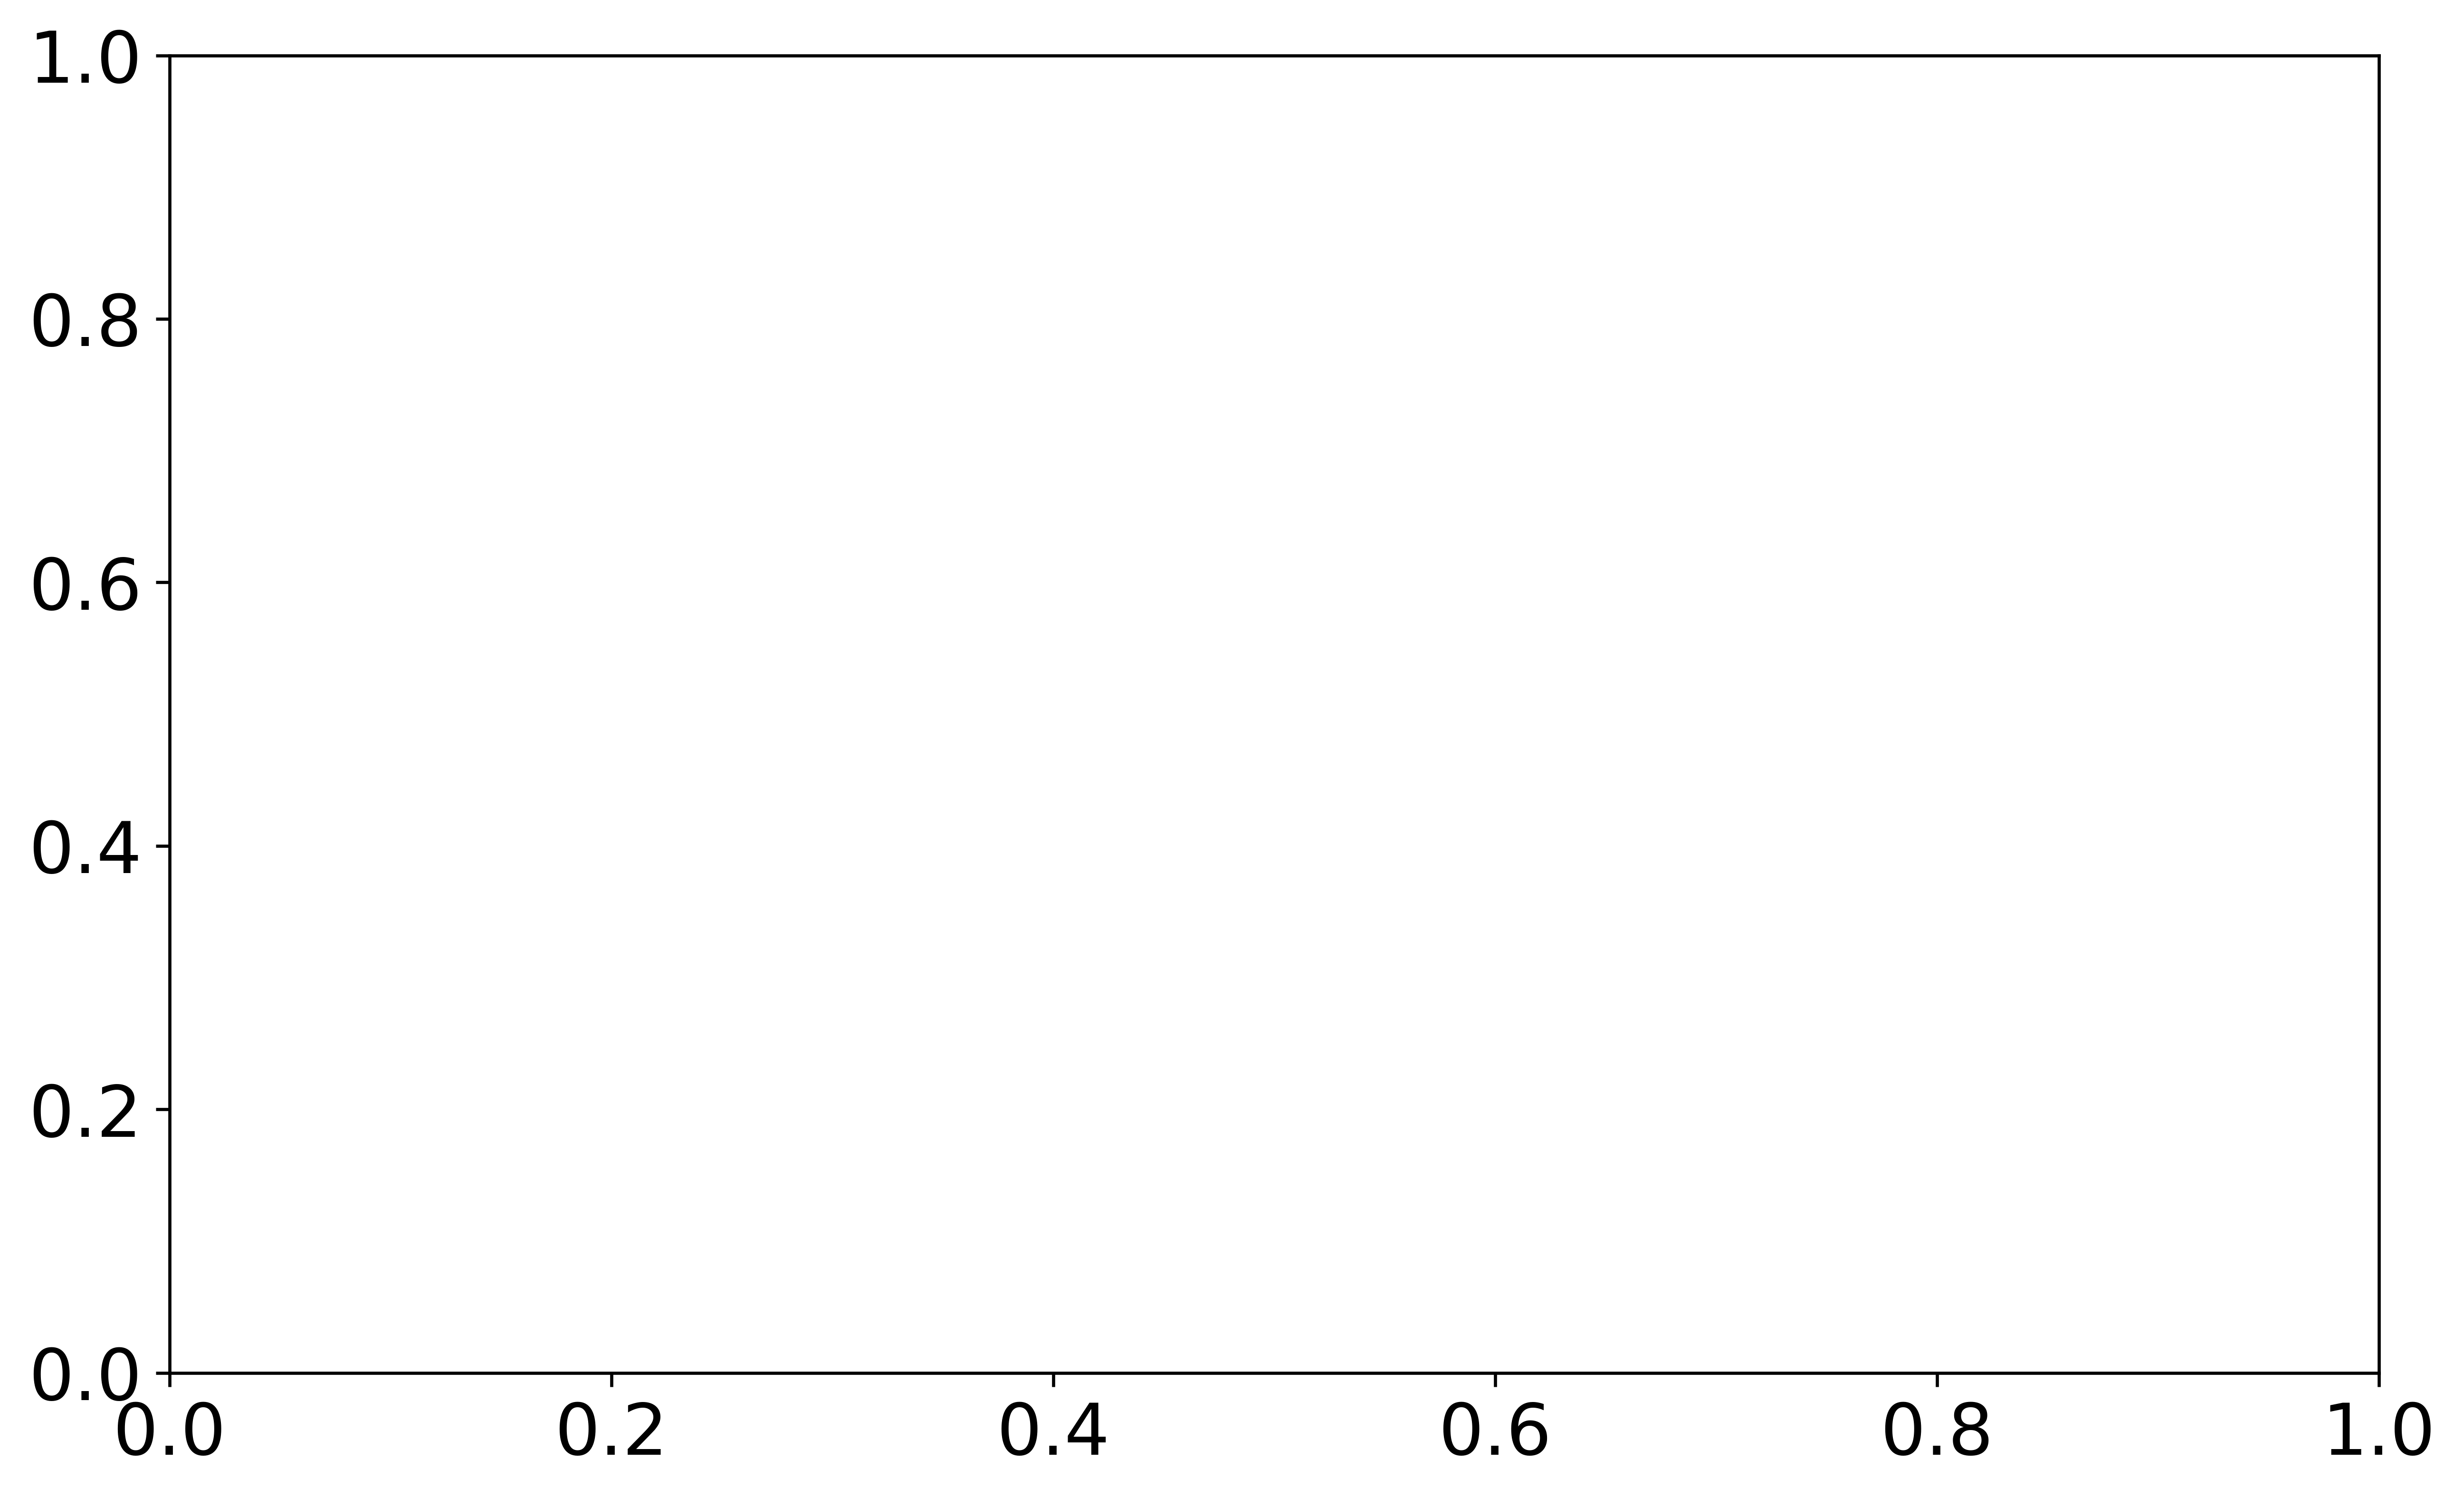

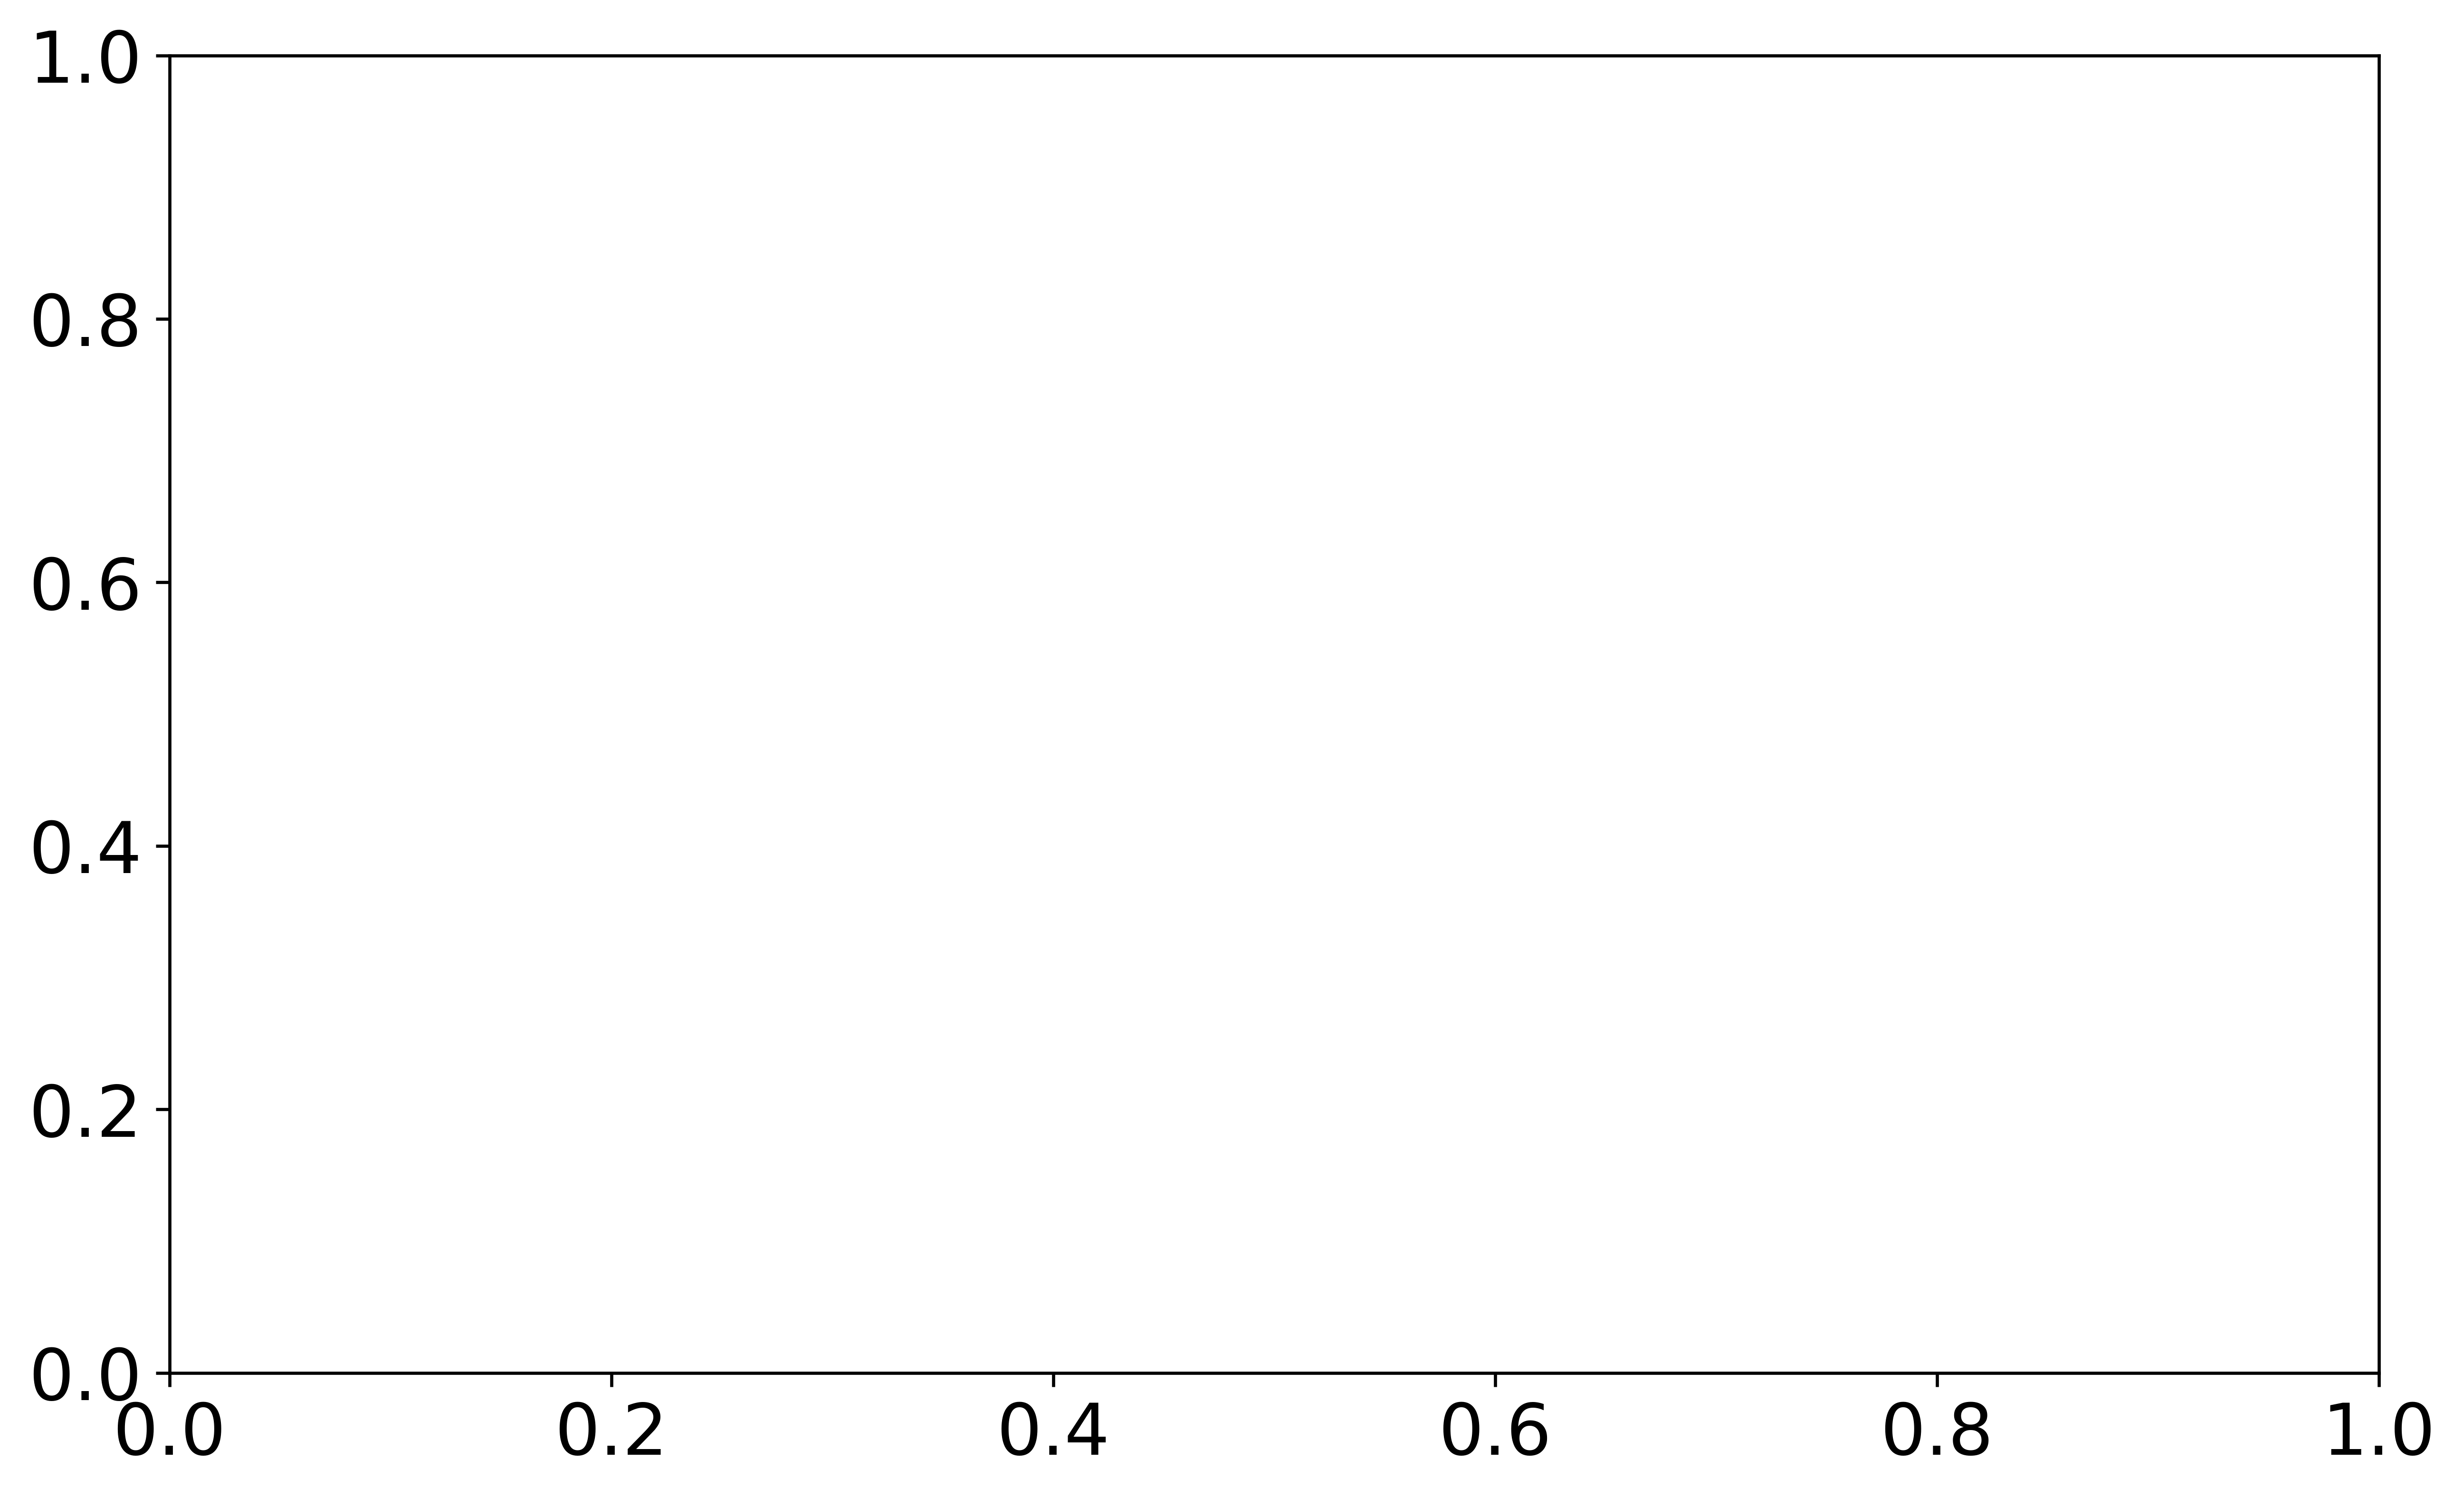

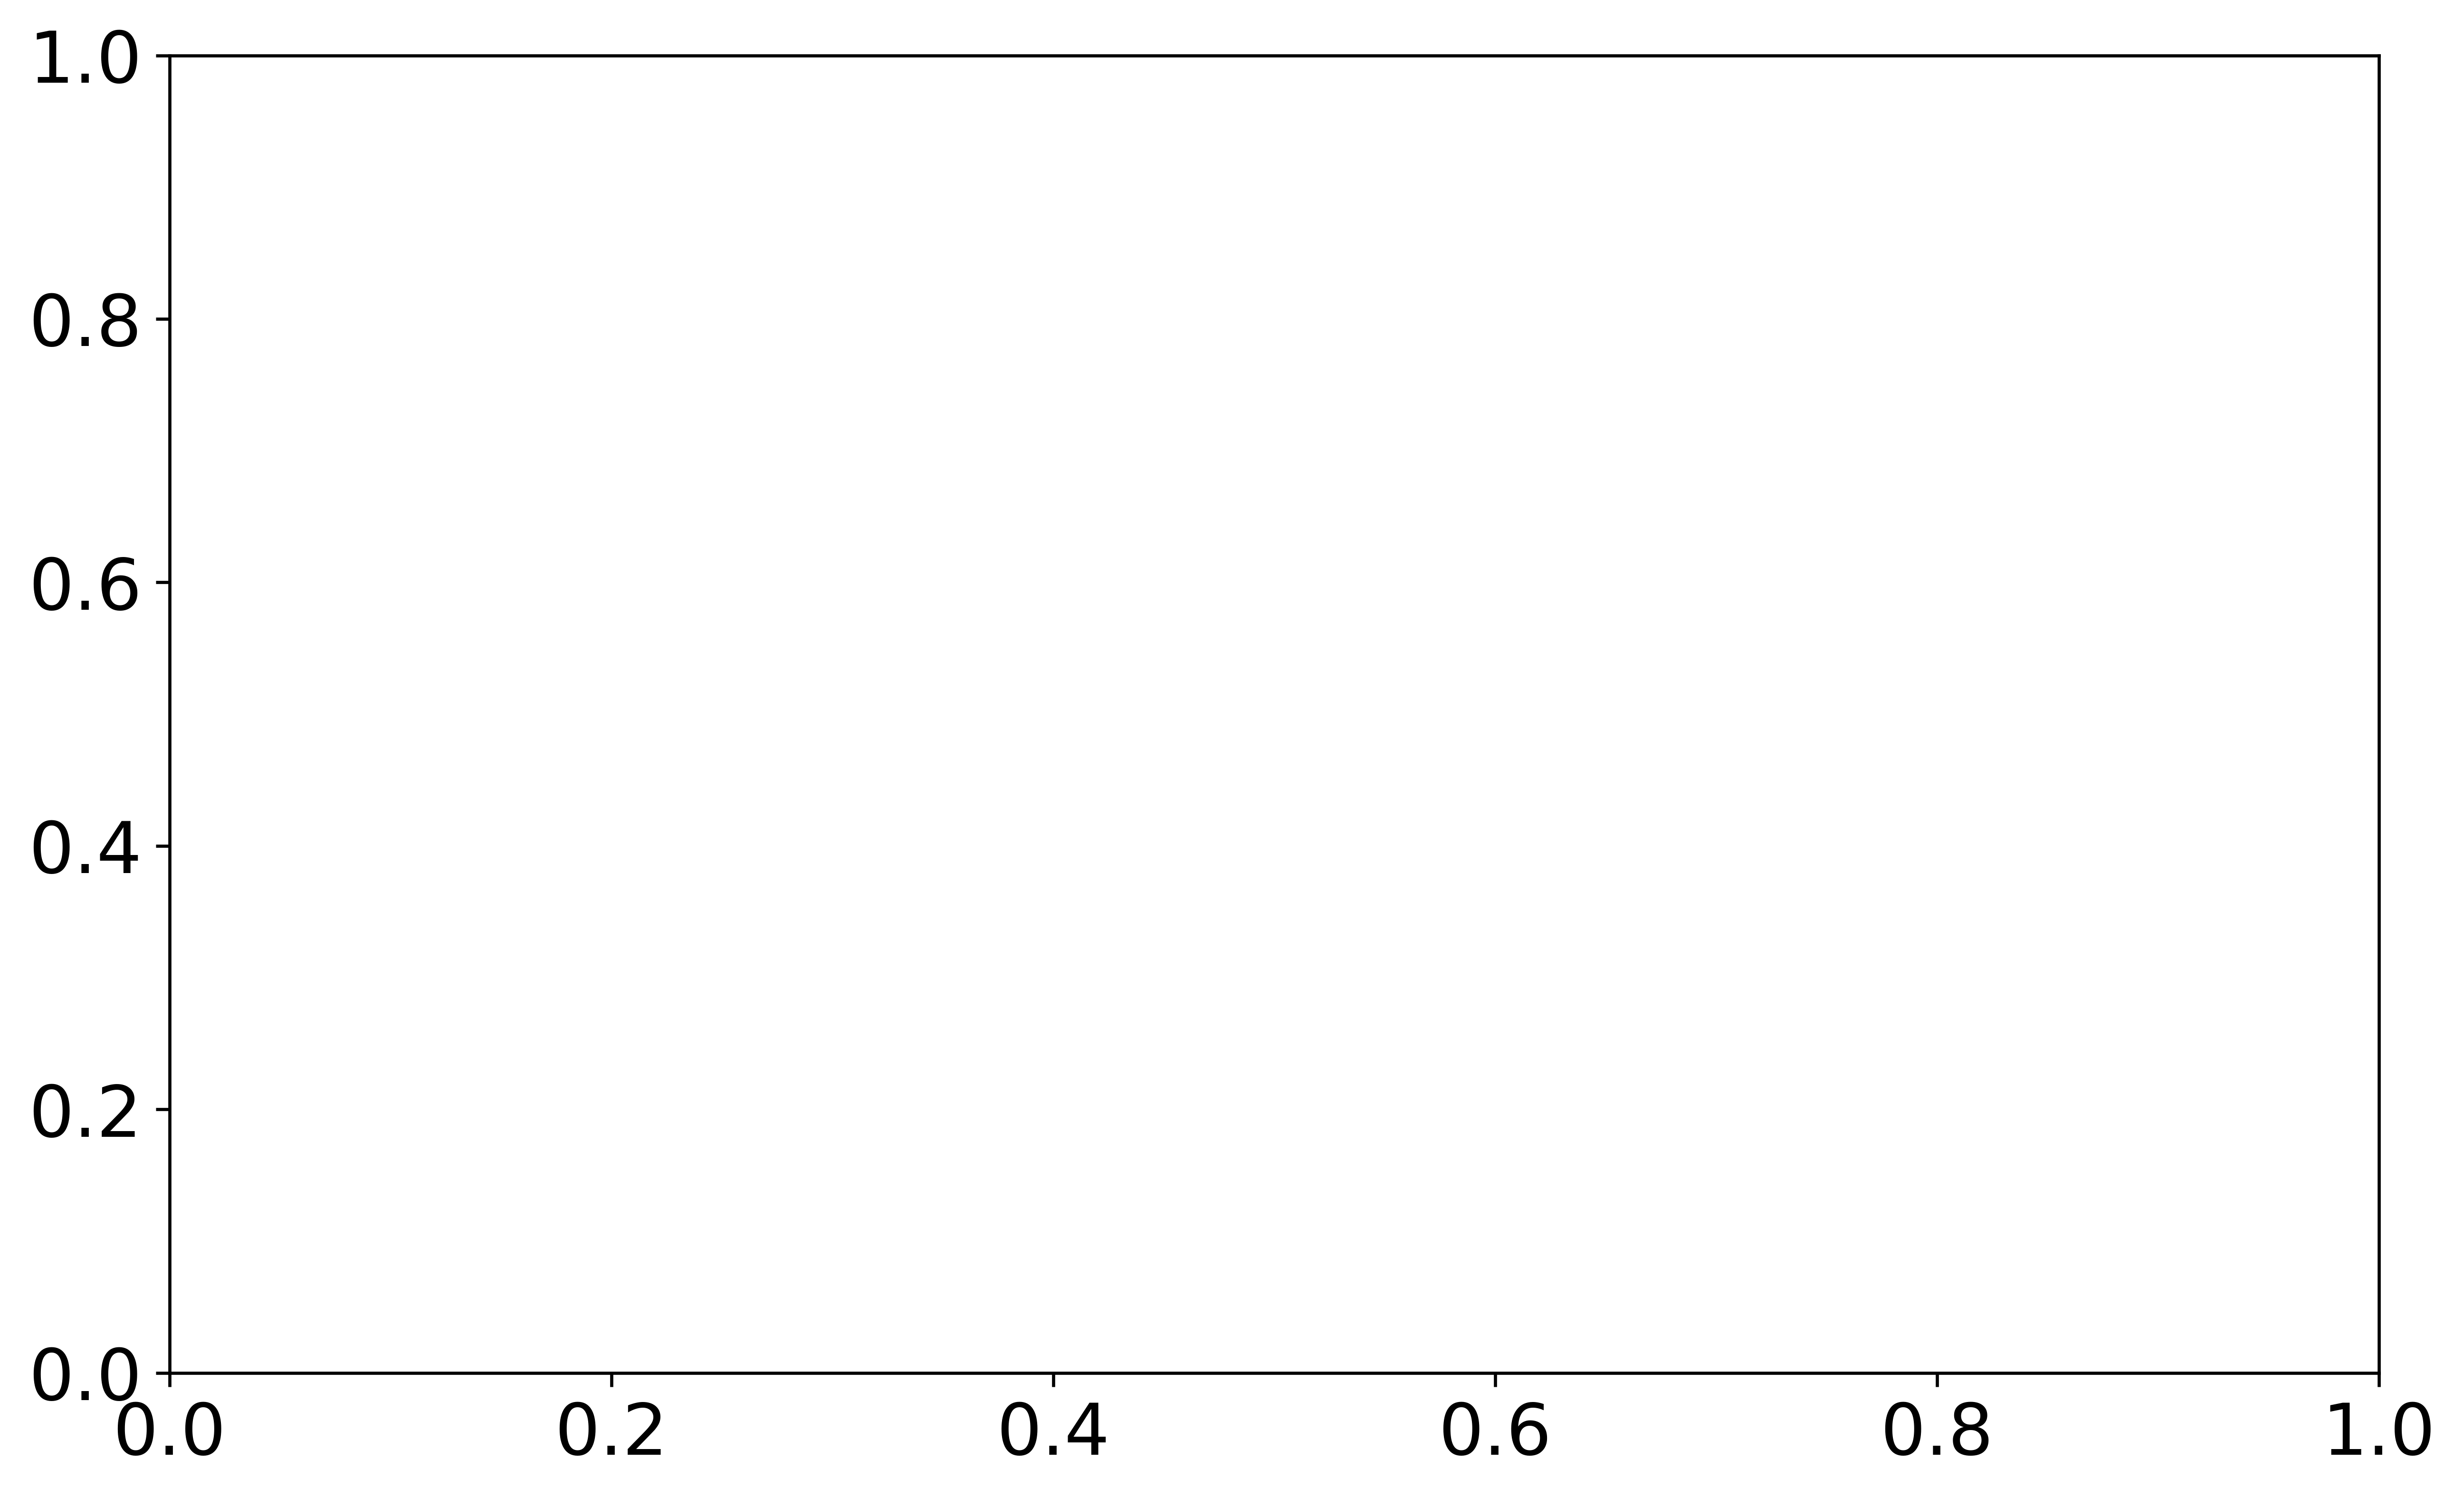

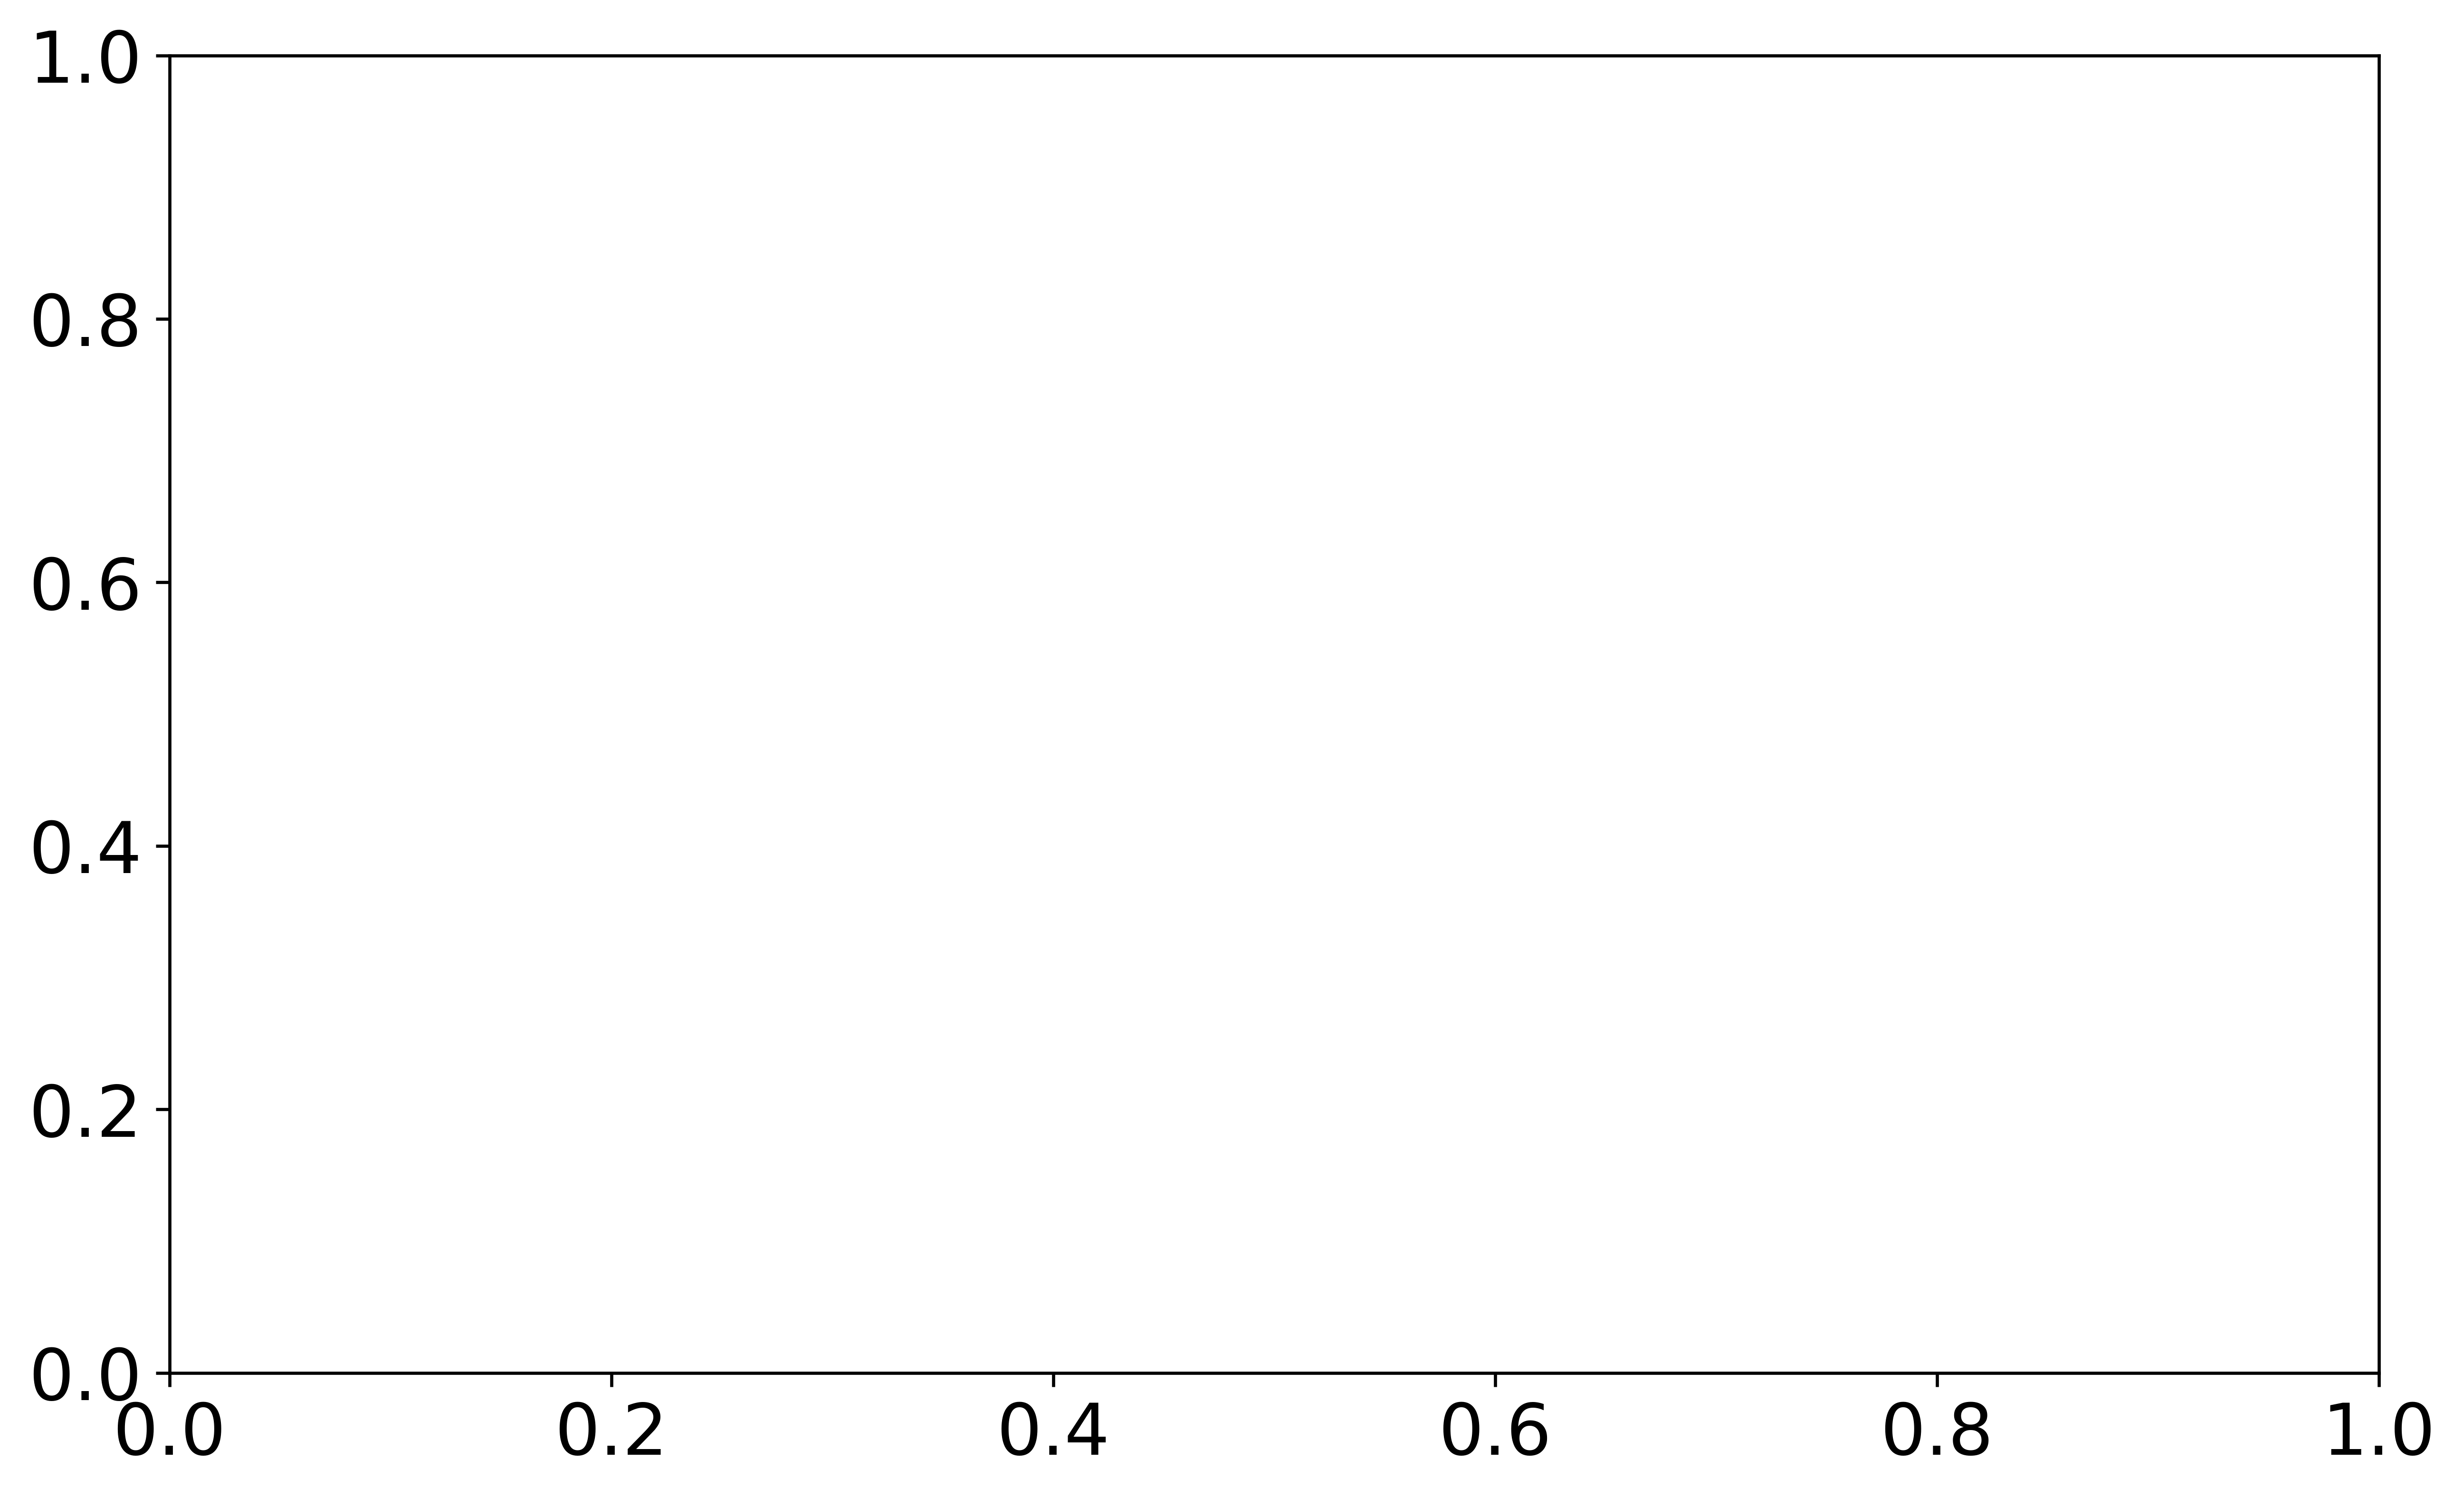

In [6]:
# Read the saved statistics
wt_df = pd.read_csv(os.path.join(fig_dir, 'wt_species_statistics.csv'))
mt_df = pd.read_csv(os.path.join(fig_dir, 'mt_species_statistics.csv'))

# Function to convert string of comma-separated values to numpy array
def str_to_array(s):
    return np.array([float(x) for x in s.split(',')])

# Debug: Print available species
logging.info("Available species in WT:")
logging.info (wt_df['Species'].tolist())
logging.info("Available species in MT:")
logging.info(mt_df['Species'].tolist())

# Get unique species names directly from the CSV
unique_species = set(wt_df['Species'].unique()) | set(mt_df['Species'].unique())
logging.info(f"\nUnique species:  {unique_species}")

# Plot settings
plt.style.use('default')
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['figure.dpi'] = 600
plt.rcParams['font.size'] = 18  # Increase base font size
plt.rcParams['axes.titlesize'] = 28  # Increase title font size
plt.rcParams['axes.labelsize'] = 18  # Increase axis label font size
plt.rcParams['xtick.labelsize'] = 18  # Increase tick label font size
plt.rcParams['ytick.labelsize'] = 18  # Increase tick label font size
plt.rcParams['legend.fontsize'] = 18  # Increase legend font size


# Create plots for each species
for species_name in unique_species:
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Safely get data
    wt_species_data = wt_df[wt_df['Species'] == species_name]
    mt_species_data = mt_df[mt_df['Species'] == species_name]
    
    if len(wt_species_data) == 0 or len(mt_species_data) == 0:
        logging.info(f"Skipping {species_name} - data not found")
        continue
        
    wt_data = wt_species_data.iloc[0]
    mt_data = mt_species_data.iloc[0]
    
    # Get time arrays and data for both datasets
    wt_time = str_to_array(wt_data['Time'])
    mt_time = str_to_array(mt_data['Time'])
    wt_avg = str_to_array(wt_data['Average'])
    wt_std = str_to_array(wt_data['Std'])
    mt_avg = str_to_array(mt_data['Average'])
    mt_std = str_to_array(mt_data['Std'])
    
    # Find common time points
    common_times = np.intersect1d(wt_time, mt_time)
    logging.info(f"Number of common time points for {species_name}: {len(common_times)}")
    
    # Get indices for common time points in each dataset
    wt_indices = np.isin(wt_time, common_times)
    mt_indices = np.isin(mt_time, common_times)
    
    # Filter data to include only common time points
    time = common_times
    wt_avg = wt_avg[wt_indices]
    wt_std = wt_std[wt_indices]
    mt_avg = mt_avg[mt_indices]
    mt_std = mt_std[mt_indices]
    
    # Convert time from minutes to hours
    time_hours = time / 60.0
    
    # Extract only the part after underscore for display in legend
    display_name = species_name.split('_', 1)[1] if '_' in species_name else species_name
    
    # Plot WT with solid line
    ax.plot(time_hours, wt_avg, label=f'WT {display_name}', 
            linestyle='-', linewidth=2)
    ax.fill_between(time_hours, wt_avg - wt_std, wt_avg + wt_std, 
                    alpha=0.2)
    
    # Plot MT with dashed line
    ax.plot(time_hours, mt_avg, label=f'MT {display_name}', 
            linestyle='--', linewidth=2)
    ax.fill_between(time_hours, mt_avg - mt_std, mt_avg + mt_std, 
                    alpha=0.2)
    
    # Customize plot
    ax.set_xlabel('Time (hours)')
    ax.set_ylabel('Counts')
    # ax.set_title(f'{display_name} Comparison in RDME-ODE')
    
    # Set integer hour ticks
    max_hour = int(np.ceil(max(time_hours)))
    ax.set_xticks(range(0, max_hour + 1))
    
    ax.legend(framealpha=0.3)
    ax.grid(False)  # Remove grid to match the other style
    ax.set_ylim(bottom=0)
    # Save figure
    # plt.tight_layout()
    fig_path = os.path.join(fig_dir, f'{species_name}_comparison in RDME-ODE.png')
    plt.savefig(fig_path, dpi=600, bbox_inches='tight')
    logging.info(f"Saved plot for {species_name}")
    plt.close()
## logging info cl
logging.info(f"\nPlots saved in: {fig_dir}")
logging.getLogger().handlers[0].flush() 

normalized Grep

2025-02-27 14:00:11,471 - INFO - Number of common time points for RDME_Grep: 12601


2025-02-27 14:00:12,455 - INFO - Saved normalized plot for Grep


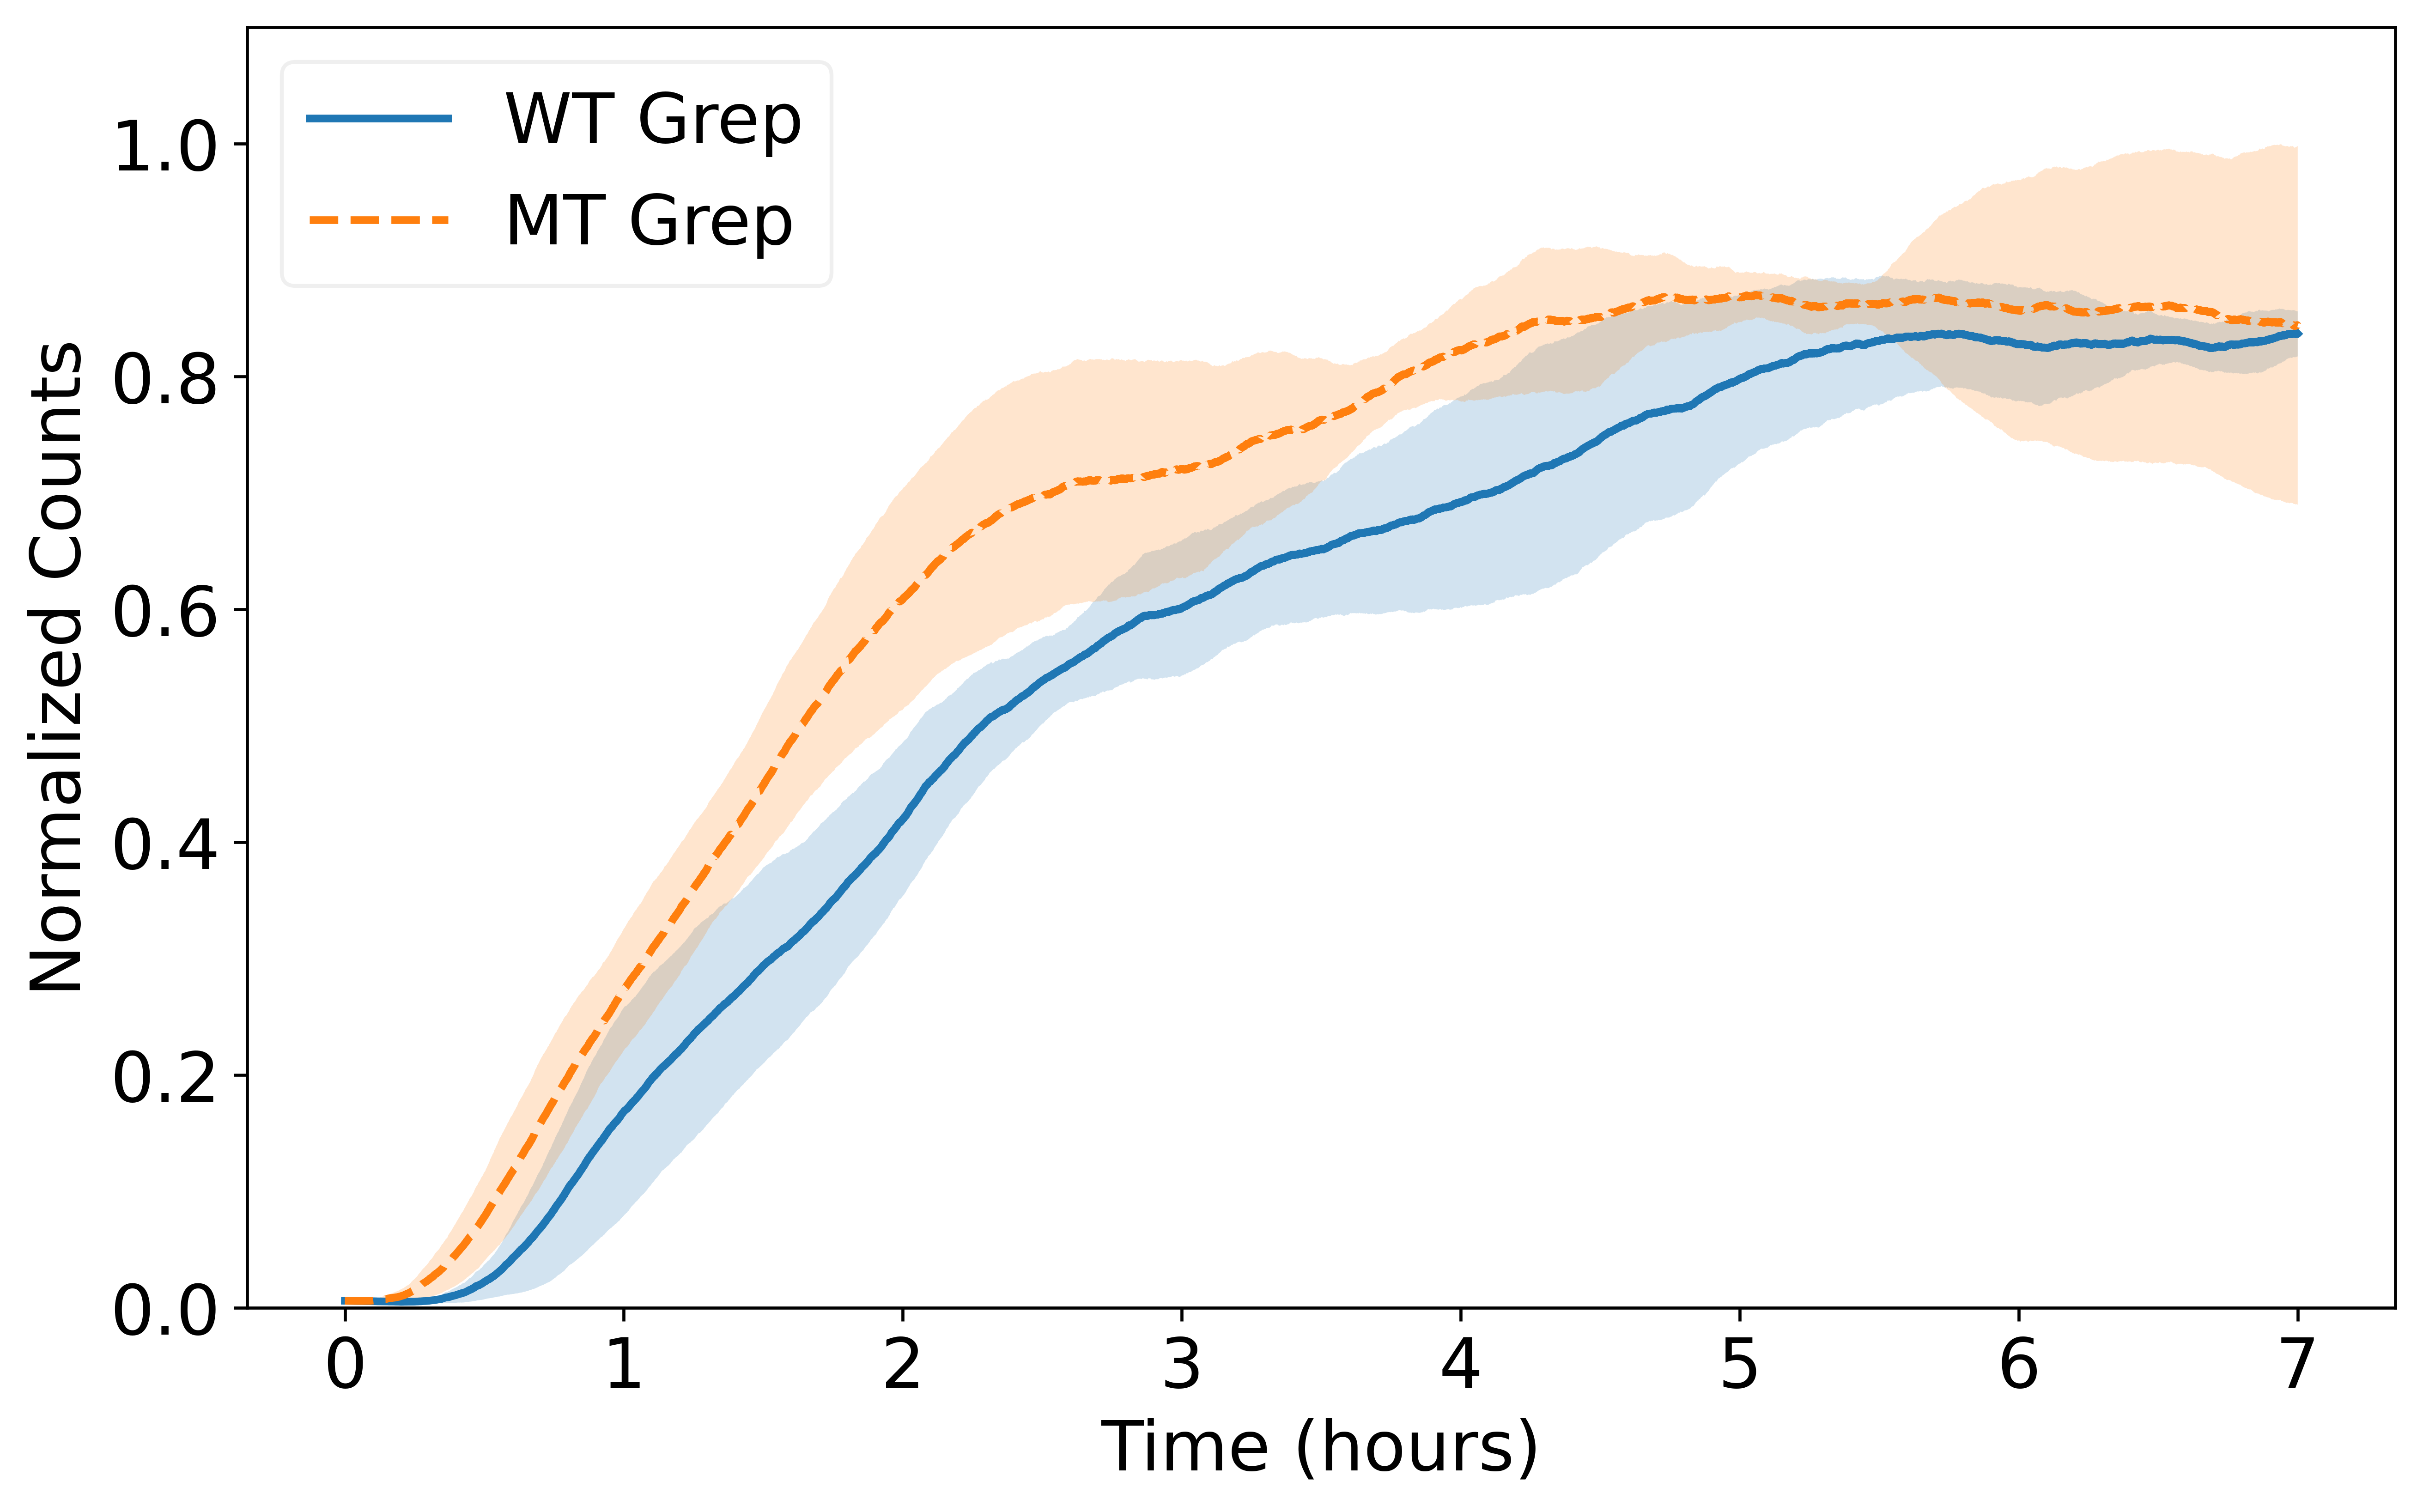

In [7]:
# Add a function to plot normalized Grep comparison
def plot_normalized_grep(wt_df, mt_df, save=True):
    """Plot comparison for Grep (reporter) with normalized y-axis (0-1)"""
    
    species_name = 'RDME_Grep'  # The species name for Grep in the dataset
    display_name = 'Grep'
    
    # Safely get data
    wt_species_data = wt_df[wt_df['Species'] == species_name]
    mt_species_data = mt_df[mt_df['Species'] == species_name]
    
    if len(wt_species_data) == 0 or len(mt_species_data) == 0:
        logging.info(f"Skipping {species_name} - data not found")
        return None
        
    wt_data = wt_species_data.iloc[0]
    mt_data = mt_species_data.iloc[0]
    
    # Get time arrays and data for both datasets
    wt_time = str_to_array(wt_data['Time'])
    mt_time = str_to_array(mt_data['Time'])
    wt_avg = str_to_array(wt_data['Average'])
    wt_std = str_to_array(wt_data['Std'])
    mt_avg = str_to_array(mt_data['Average'])
    mt_std = str_to_array(mt_data['Std'])
    
    # Find common time points
    common_times = np.intersect1d(wt_time, mt_time)
    logging.info(f"Number of common time points for {species_name}: {len(common_times)}")
    
    # Get indices for common time points in each dataset
    wt_indices = np.isin(wt_time, common_times)
    mt_indices = np.isin(mt_time, common_times)
    
    # Filter data to include only common time points
    time = common_times
    wt_avg = wt_avg[wt_indices]
    wt_std = wt_std[wt_indices]
    mt_avg = mt_avg[mt_indices]
    mt_std = mt_std[mt_indices]
    
    # Convert time from minutes to hours
    time_hours = time / 60.0
    
    # Find global max value across both datasets including standard deviations
    max_with_std_wt = np.max(wt_avg + wt_std)
    max_with_std_mt = np.max(mt_avg + mt_std)
    global_max = max(max_with_std_wt, max_with_std_mt)
    
    # Normalize both datasets using the global max
    norm_wt_avg = wt_avg / global_max
    norm_wt_std = wt_std / global_max
    
    norm_mt_avg = mt_avg / global_max
    norm_mt_std = mt_std / global_max
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Plot WT with solid line
    ax.plot(time_hours, norm_wt_avg, label=f'WT {display_name}', 
            linestyle='-', linewidth=2)
    ax.fill_between(time_hours, norm_wt_avg - norm_wt_std, norm_wt_avg + norm_wt_std, 
                    alpha=0.2)
    
    # Plot MT with dashed line
    ax.plot(time_hours, norm_mt_avg, label=f'MT {display_name}', 
            linestyle='--', linewidth=2)
    ax.fill_between(time_hours, norm_mt_avg - norm_mt_std, norm_mt_avg + norm_mt_std, 
                    alpha=0.2)
    
    # Customize plot
    ax.set_xlabel('Time (hours)')
    ax.set_ylabel('Normalized Counts')
    
    # Set integer hour ticks
    max_hour = int(np.ceil(max(time_hours)))
    ax.set_xticks(range(0, max_hour + 1))
    
    # Set y-axis limits to 0-1
    ax.set_ylim(0, 1.1)  # Slightly above 1 to show the full range
    
    ax.legend(framealpha=0.3, loc='upper left')
    ax.grid(False)
    
    # Save figure
    if save:
        # plt.tight_layout()
        fig_path = os.path.join(fig_dir, f'{species_name}_normalized_comparison in RDME-ODE.png')
        plt.savefig(fig_path, dpi=600, bbox_inches='tight')
        logging.info(f"Saved normalized plot for {display_name}")
        plt.close()
    else:
        # plt.tight_layout()
        plt.show()
        
    return fig

# Add this after your existing plotting loop
# Plot normalized version for Grep (reporter)
plot_normalized_grep(wt_df, mt_df)